# Mean Force Integration

Import HILLS and COLVAR files, compute the mean force and integrate using the pyMFI (would be) module. 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
if 'path' in locals():
    os.chdir(path)
    print("The path is:", path)
else: 
    os.chdir("../")
    path = os.getcwd()
    print("The path is:", path)
from pyMFI import MFI
from pyMFI import run_plumed
path = os.getcwd()
if os.path.isdir("Notebooks/results_plot") == False: os.mkdir("Notebooks/results_plot")

The path is: /home/ucecabj/Desktop/pyMFI_git


### 2D - Periodic CV space example - Alanine Dipeptide. 

|1000/5000|==> Average Mean Force Error: 30.84506749356906
|2000/5000|==> Average Mean Force Error: 30.713383568308927
|3000/5000|==> Average Mean Force Error: 30.000820510559787
|4000/5000|==> Average Mean Force Error: 30.042455463809798
|5000/5000|==> Average Mean Force Error: 29.738808755542607


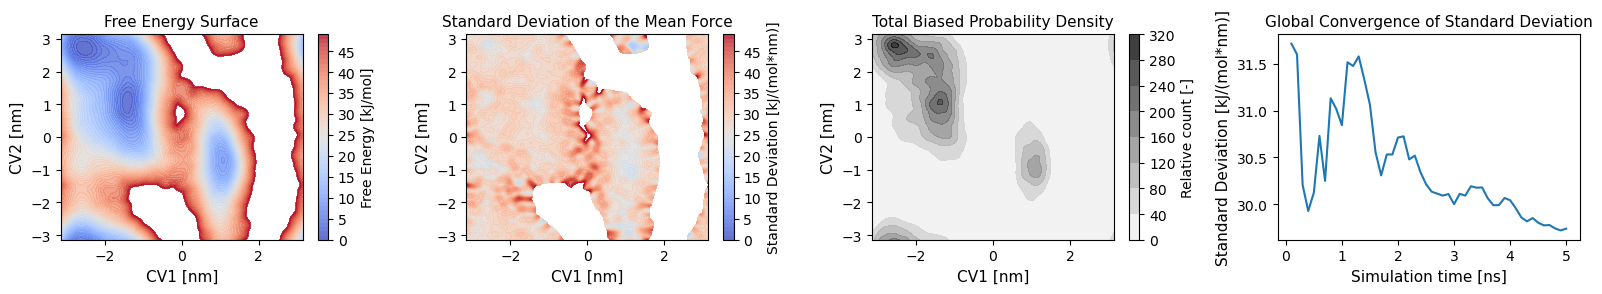

In [2]:
os.chdir(path)
os.chdir("/home/ucecabj/Desktop/pyMFI_git/DATA_examples/AlanineDipeptide_pyMFI")

#Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLS40")

#Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="position40")

#Compute the time-independent mean force
results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 2.49, log_pace = 1000, error_pace = 100, WellTempered=1, nhills=5000, periodic=1)
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results

#integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y, min_grid=np.array((-np.pi, -np.pi)), max_grid=np.array((np.pi, np.pi)), periodic=1)

# Plot Recap
MFI.plot_recap_2D(X, Y, FES, Ftot_den, ofe, ofe_history, time_history)

### 2D - Non-periodic case | Bjola potential

|1000/5000|==> Average Mean Force Error: 11.451904285999515
|2000/5000|==> Average Mean Force Error: 11.089270065309497
|3000/5000|==> Average Mean Force Error: 11.232308166534276
|4000/5000|==> Average Mean Force Error: 11.324658798270324
|5000/5000|==> Average Mean Force Error: 11.445922382395088


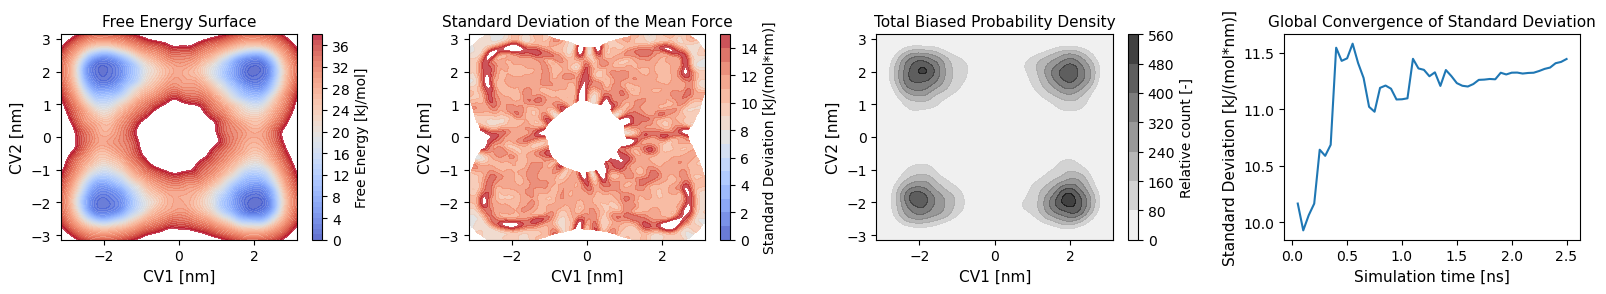

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pyMFI import MFI
from pyMFI import langevin
os.chdir("/home/ucecabj/Desktop/pyMFI_git/DATA_examples/Antoniu_2D_potential")


#Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLS_potential")

#Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="position_potential")

#Compute the time-independent mean force
results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 1, log_pace = 1000, error_pace = 100, nhills=5000, min_grid=np.array((-2, -2)), max_grid=np.array((2, 2)), nbins=np.array((200, 200)))
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results

#integration on a periodic domain
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y, min_grid=np.array((-2, -2)), max_grid=np.array((2, 2)), periodic=0)

# Plot Recap
MFI.plot_recap_2D(X, Y, FES, Ftot_den, ofe, ofe_history, time_history, FES_lim=39, ofe_map_lim=16)

### 2D patching independent,  short simulations | Bjola potential

Simulation: 0|500/500|==> Average Mean Force Error: 10.399629663005394
Simulation: 1|500/500|==> Average Mean Force Error: 10.530942223947239
Simulation: 2|500/500|==> Average Mean Force Error: 10.244437980282923
Simulation: 3|500/500|==> Average Mean Force Error: 11.733569925819545
Simulation: 4|500/500|==> Average Mean Force Error: 10.512789763355075
Simulation: 5|500/500|==> Average Mean Force Error: 11.485342618963347
Simulation: 6|500/500|==> Average Mean Force Error: 10.679341665568073
Simulation: 7|500/500|==> Average Mean Force Error: 11.22256496084065
Simulation: 8|500/500|==> Average Mean Force Error: 10.816575842982566
Simulation: 9|500/500|==> Average Mean Force Error: 10.994859969276224
Simulation: 10|500/500|==> Average Mean Force Error: 11.252793336902304
Simulation: 11|500/500|==> Average Mean Force Error: 11.147626471930993
Simulation: 12|500/500|==> Average Mean Force Error: 13.255351489167865
Simulation: 13|500/500|==> Average Mean Force Error: 10.943628979756062
Sim

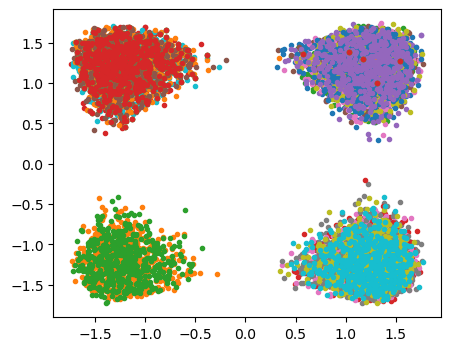

In [8]:
os.chdir("/home/ucecabj/Desktop/pyMFI_git/DATA_examples/Antoniu_2D_potential")
master = []

for simulation in np.arange(0,24): 
    #RUN short sim from random location
    # ipos=1.3*(2 * np.random.rand(2) - 1)    
    # run_plumed.run_langevin2D(simulation_steps = 50000, initial_position_x=ipos[0], initial_position_y=ipos[1], gaus_width_x=0.1, gaus_width_y=0.1, gaus_height=2, biasfactor=20, gaus_pace=100, file_extension=str(simulation))
    #langevin.run_2D(ipos=ipos,tag=simulation)
    
    #Read the position and HILLS file
    print('Simulation: '+str(simulation), end="")
    [position_x, position_y] = MFI.load_position_2D(position_name="position_"+str(simulation))
    HILLS=MFI.load_HILLS_2D(hills_name="HILLS_"+str(simulation))
    plt.plot(HILLS[:,1],HILLS[:,2],'.')

    #COMPUTE Mean force and weight of the simulation
    results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 1, log_pace = 500, error_pace = 500, nhills=-1, min_grid=np.array((-2, -2)), max_grid=np.array((2, 2)), nbins=np.array((200, 200)))
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results
    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])


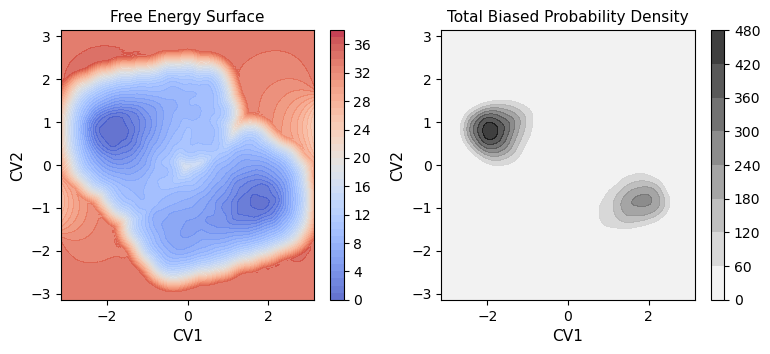

In [10]:
#Patch
[Ftot_den_patch, Ftot_den2_patch, Ftot_x_patch, Ftot_y_patch, ofv_num_x_patch, ofv_num_y_patch] = MFI.patch_2D(master)

#integration on a periodic domain
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x_patch, Ftot_y_patch, min_grid=np.array((-2, -2)), max_grid=np.array((2, 2)))

# Plot Recap
MFI.plot_patch_2D(X, Y, FES, Ftot_den_patch, lim=39)


### 2D - Non-periodic case | Invernizzi potential

Simulation: 0|500/500|==> Average Mean Force Error: 10.525360807519816
Simulation: 1|500/500|==> Average Mean Force Error: 10.561298290704666
Simulation: 2|500/500|==> Average Mean Force Error: 10.628231281547338
Simulation: 3|500/500|==> Average Mean Force Error: 11.328458341470865
Simulation: 4|500/500|==> Average Mean Force Error: 10.670869733677883
Simulation: 5|500/500|==> Average Mean Force Error: 10.463003658239426
Simulation: 6|500/500|==> Average Mean Force Error: 9.390922955221802
Simulation: 7|500/500|==> Average Mean Force Error: 10.559004021722648
Simulation: 8|500/500|==> Average Mean Force Error: 10.973435794170106
Simulation: 9|500/500|==> Average Mean Force Error: 10.067180811808935
Simulation: 10|500/500|==> Average Mean Force Error: 11.238594015366557
Simulation: 11|500/500|==> Average Mean Force Error: 10.756041653220402
Simulation: 12|500/500|==> Average Mean Force Error: 10.480923692844355
Simulation: 13|500/500|==> Average Mean Force Error: 10.27782694747422
Simu

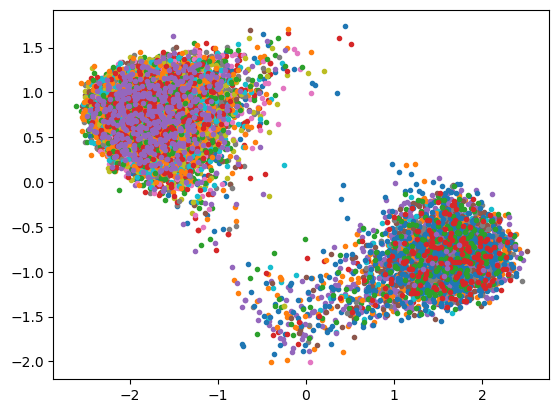

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyMFI import MFI
from pyMFI import langevin

os.chdir("/home/ucecabj/Desktop/pyMFI_git/DATA_examples/Invernizzi_2D_potential_more_data")


master = []

for simulation in np.arange(0,25): 
    #RUN short sim from random location
    # ipos=1.3*(2 * np.random.rand(2) - 1)
    # run_plumed.run_2D_Invernizzi(simulation_steps=100000, sigma=0.1, height=0.8, biasfactor=10, initial_position_x=ipos[0], initial_position_y=[1], file_extension=str(simulation))
    
    #Read the position and HILLS file
    print('Simulation: '+str(simulation), end="")
    [position_x, position_y] = MFI.load_position_2D(position_name="positioninve_"+str(simulation))
    HILLS=MFI.load_HILLS_2D(hills_name="HILLSinve_"+str(simulation))
    plt.plot(HILLS[:,1],HILLS[:,2],'.')  
    
    #COMPUTE Mean force and weight of the simulation
    results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.12, kT = 1, log_pace = 500, error_pace = 500, nhills=-1, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)), nbins=np.array((200, 200)), FES_cutoff = 20)
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results
    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])    
    

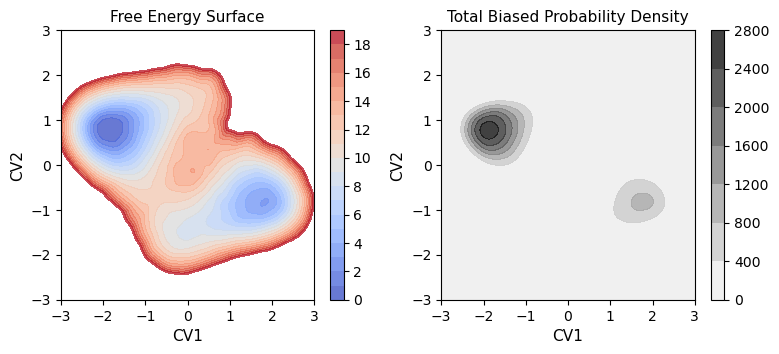

In [3]:
#Patch
[Ftot_den_patch, Ftot_den2_patch, Ftot_x_patch, Ftot_y_patch, ofv_num_x_patch, ofv_num_y_patch] = MFI.patch_2D(master)

#integration on a periodic domain
[X, Y, FES] = MFI.intgrad2(Ftot_x_patch, Ftot_y_patch, min_grid=np.array((-3, -3)), max_grid=np.array((3, 3)))

# Plot Recap
MFI.plot_patch_2D(X, Y, FES, Ftot_den_patch,lim=20)


### Bootstrap Error of the Invernizzi potential

Itteration: |100/500|  sd= 0.51
Itteration: |200/500|  sd= 0.515
Itteration: |300/500|  sd= 0.507
Itteration: |400/500|  sd= 0.505
Itteration: |500/500|  sd= 0.506


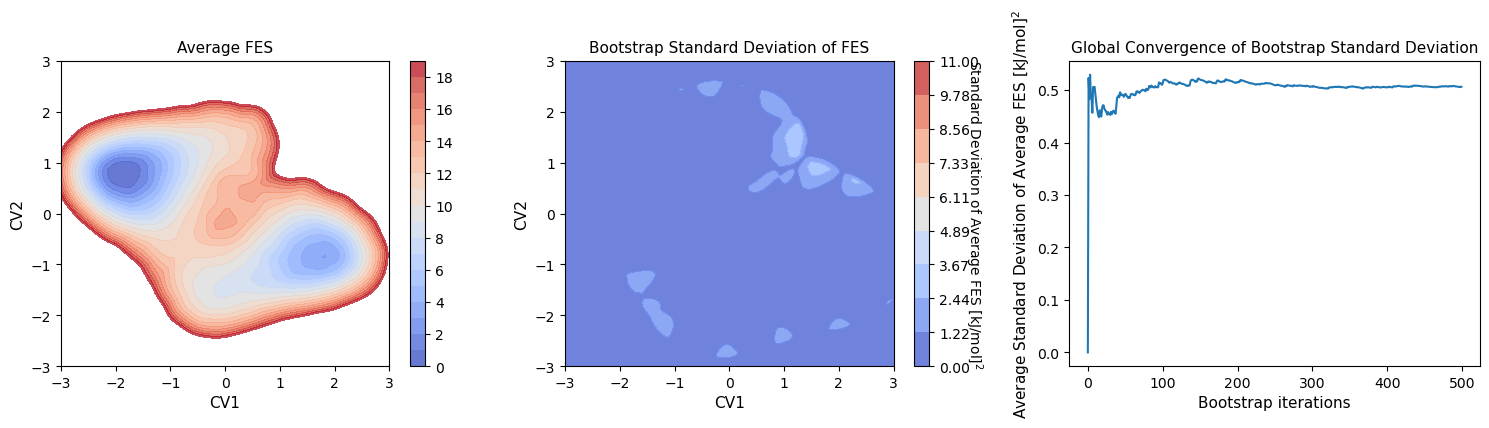

In [4]:
# #Load master terms if not available
# master = MFI.load_pkl("/home/ucecabj/Desktop/pyMFI_git/DATA_examples/Invernizzi_2D_potential/master_inv")

#Select force terms
master_array = np.asarray(master)
forces_all = master_array[:, [0,2,3], :]

#Run Bootstrap 
[FES_avr, sd_fes, sd_fes_prog ] = MFI.bootstrap_2D_new(X, Y, forces_all, n_bootstrap=500, FES_cutoff = 0, periodic=0, log_pace=-1)

#Plot
MFI.plot_bootstrap(X, Y, FES_avr, MFI.zero_to_nan(sd_fes), sd_fes_prog, FES_lim=20, ofe_lim=11, FES_step=1, ofe_step=1)
plt.tight_layout()